In [35]:
# %load eval/withholding.py
%matplotlib notebook
import matplotlib as plt
import numpy as np
import pandas as pd

df = pd.read_csv("data/withholding.tsv", sep="\t")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

def parse_array(s):
    try:
        return np.fromstring(s, dtype=float, sep="|")
    except:
        return np.array([float('nan')])

def expand(row):
    compute = parse_array(row.compute)
    rcompute = compute / np.sum(compute)
    activations = parse_array(row.activations)
    assert(np.sum(activations) == row.number_activations or row.error)
    ractivations = activations / row.number_activations
    reward = parse_array(row.reward)
    rreward = reward / np.sum(reward)
    d = {}
    d['attacker_compute'] = rcompute[0]
    d['attacker_relative_activations'] = ractivations[0]
    d['attacker_relative_reward'] = rreward[0]
    d['attacker_gain'] = rreward[0] - ractivations[0]
    d['attacker_efficiency'] = rreward[0] / ractivations[0]
    return d

df=df.join(df.apply(expand, axis=1, result_type='expand'))

In [36]:
df.columns

Index(['network', 'network_description', 'compute', 'protocol', 'k',
       'protocol_description', 'block_interval', 'activation_delay',
       'number_activations', 'activations', 'incentive_scheme',
       'incentive_scheme_description', 'scenario', 'scenario_description',
       'strategy', 'strategy_description', 'reward', 'machine_duration_s',
       'error', 'attacker_compute', 'attacker_relative_activations',
       'attacker_relative_reward', 'attacker_gain', 'attacker_efficiency'],
      dtype='object')

In [37]:
df.pivot(index=['attacker_compute', 'k'], columns=['protocol', 'strategy', 'incentive_scheme'], values='attacker_gain')

protocol                      bk+ll                                       \
strategy             selfish-simple           selfish-advanced             
incentive_scheme           constant     block         constant     block   
attacker_compute k                                                         
0.1              1         0.000000  0.000000        -0.099981 -0.099981   
                 2        -0.036089  0.009081        -0.076461 -0.078419   
                 4        -0.052866  0.026695        -0.083405 -0.073991   
                 8        -0.058914  0.062023        -0.085543 -0.063350   
                 16       -0.058746  0.123492        -0.084200 -0.038635   
...                             ...       ...              ...       ...   
0.5              8         0.034365  0.432846         0.361830  0.457578   
                 16        0.028580  0.493132         0.438259  0.498601   
                 32        0.015550  0.500092         0.469951  0.499562   
                 64        0.007862  0.499562         0.483020  0.500298   
                 128       0.004033  0.500268         0.491986  0.499755   

protocol                                             bk            \
strategy                honest           selfish-simple             
incentive_scheme      constant     block       constant     block   
attacker_compute k                                                  
0.1              1    0.000000  0.000000       0.000000  0.000000   
                 2    0.000000 -0.000043      -0.057053 -0.037362   
                 4    0.000000  0.000123      -0.076999 -0.055180   
                 8    0.000000  0.000803      -0.084469 -0.061188   
                 16   0.000000  0.000131      -0.087287 -0.060981   
...                        ...       ...            ...       ...   
0.5              8    0.000000 -0.001372       0.001764  0.146779   
                 16   0.000000 -0.001694       0.007687  0.171077   
                 32   0.000000  0.002187       0.003998  0.170382   
                 64   0.000000  0.004417       0.002442  0.170113   
                 128 -0.000006  0.002547       0.004003  0.171028   

protocol                                                                 
strategy             selfish-advanced                  honest            
incentive_scheme             constant     block      constant     block  
attacker_compute k                                                       
0.1              1          -0.082907 -0.082907  0.000000e+00  0.000000  
                 2          -0.089105 -0.088251  0.000000e+00  0.000487  
                 4          -0.093005 -0.089327  0.000000e+00  0.000079  
                 8          -0.094616 -0.087908  0.000000e+00 -0.000333  
                 16         -0.094252 -0.081087  0.000000e+00 -0.001277  
...                               ...       ...           ...       ...  
0.5              8           0.349341  0.432450  0.000000e+00 -0.000868  
                 16          0.433863  0.499013  0.000000e+00  0.000170  
                 32          0.468660  0.499997  0.000000e+00 -0.000594  
                 64          0.484121  0.500012  0.000000e+00  0.005424  
                 128         0.491876  0.499943 -1.907322e-08  0.008106  

[64 rows x 12 columns]

<IPython.core.display.Javascript object>


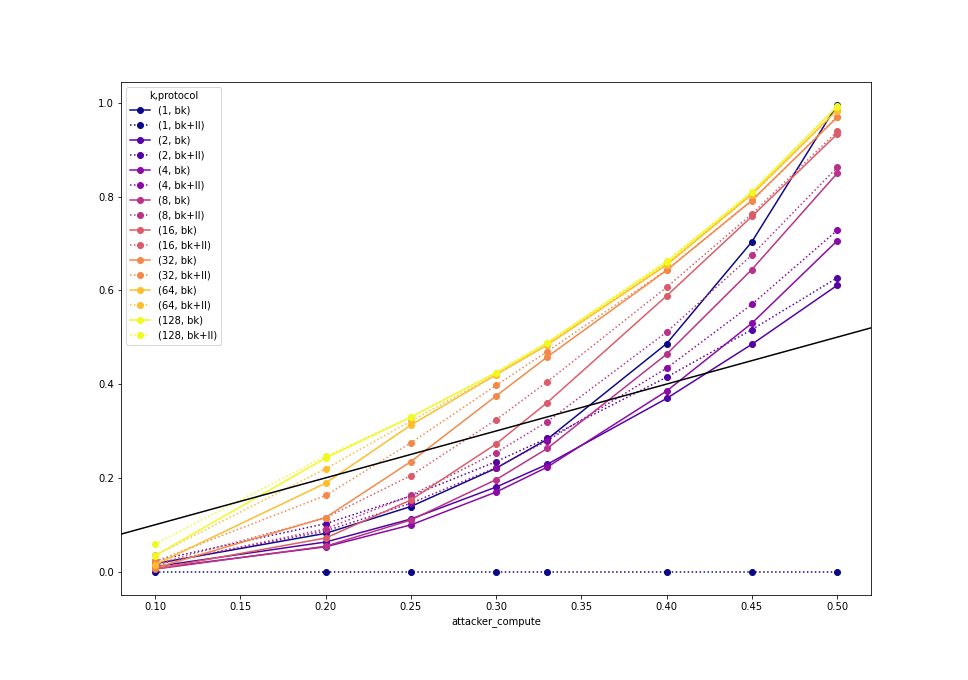

In [70]:
d = df[(df['strategy']=='selfish-advanced') & (df['incentive_scheme']=='constant')].pivot(index=['attacker_compute'], columns=['k', 'protocol'], values='attacker_relative_reward')
d = d[sorted(d.columns)]
line_style = [ 'o-' if proto == 'bk' else 'o:' for (k, proto) in  d.columns]
k = np.unique([ k for (k, proto) in d.columns])
cmap = plt.cm.get_cmap('plasma', len(k))
colormap = { k: cmap(i) for (i, k) in enumerate(k) }
line_colors = [ colormap[k] for (k, proto) in d.columns ]
line_colors
p = d.plot(style=line_style, color=line_colors)
p.axline([.1, .1], [.5, .5], color='black')